In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
#CASE 1 -> Number of Studies 
filepath = '/FileStore/tables/clinicaltrial_2021.csv'
clinicalrdd = sc.textFile(filepath)\
.filter(lambda x: not x.startswith('I'))
clinicalrdd.count()

Out[14]: 387261

In [0]:
def frequency(rdd,x):
    rddoutput = rdd.reduceByKey(lambda x,y: x+y)\
    .map(lambda x: (x[1],x[0])).sortByKey(ascending = False)\
    .map(lambda x: (x[1],x[0]))
    return rddoutput.take(x)

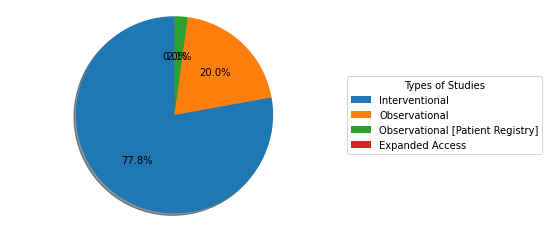

Out[16]: [('Interventional', 301472),
 ('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Expanded Access', 69)]

In [0]:
#CASE 2 -> Types of Studies
type_rdd = clinicalrdd.map(lambda x : x.split('|'))\
.map(lambda x:x[5]).map(lambda x: (x,1))
Types_of_Studies = frequency(type_rdd,5)

#Visualization
labels = list(map(lambda x: x[0] ,Types_of_Studies))
sizes = list(map(lambda x: x[1] ,Types_of_Studies))
fig1, ax1 = plt.subplots()

wedges, texts, autotexts =ax1.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 

ax1.legend(wedges, labels,
          title="Types of Studies",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Types_of_Studies

Out[17]: [('Carcinoma', 13389),
 ('Diabetes Mellitus', 11080),
 ('Neoplasms', 9371),
 ('Breast Neoplasms', 8640),
 ('Syndrome', 8032)]

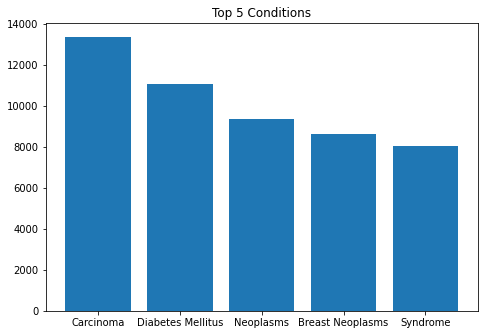

In [0]:
#CASE 3 -> Top 5 Conditions
condition_rdd = clinicalrdd.map(lambda x : x.split('|'))\
.map(lambda x:x[7])\
.filter(lambda x: x != u'')\
.flatMap(lambda x : x.split(','))\
.map(lambda x: (x,1))
Top_5_Conditions = frequency(condition_rdd,5)

#Visualization
x,y = zip(*Top_5_Conditions)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Top 5 Conditions')
ax.bar(x,y)

Top_5_Conditions


In [0]:
#CASE 4 -> 5 most frequent roots
meshrdd = sc.textFile('/FileStore/tables/mesh.csv')\
.map(lambda x: x.split(','))\
.map(lambda x:(x[0],x[1].split('.')[0]))
meshrdd.take(4)

Out[18]: [('term', 'tree'),
 ('Calcimycin', 'D03'),
 ('A-23187', 'D03'),
 ('Temefos', 'D02')]

Out[19]: [('C04', 143994),
 ('C23', 136079),
 ('C01', 106674),
 ('C14', 94523),
 ('C10', 92310)]

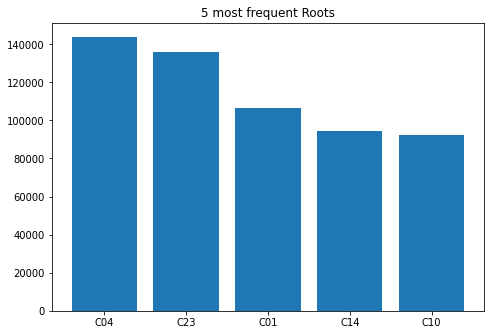

In [0]:
#CASE 4 -> 5 most frequent roots
condition_hierachy_rdd = condition_rdd.join(meshrdd).map(lambda x: (x[1][1],1))
most_frequent_roots = frequency(condition_hierachy_rdd,5)

#Visualization
a,b = zip(*most_frequent_roots)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('5 most frequent Roots')
ax.bar(a,b)

most_frequent_roots

In [0]:
#CASE 5 -> 10 most common Sponsors (excluding pharmaceutical companies)
pharma_rdd = sc.textFile('/FileStore/tables/pharma.csv')
pharma_parent_rdd = pharma_rdd.map(lambda x:(x.split(','))).map(lambda x:(x[1]).replace('"', ''))
sponsor_rdd = clinicalrdd.map(lambda x : x.split('|')).map(lambda x:x[1])
sponsor_pharma_rdd = sponsor_rdd.subtract(pharma_parent_rdd)
sponsor_pharma_pair_rdd = sponsor_pharma_rdd.map(lambda x: (x,1))
most_common_sponsors = frequency(sponsor_pharma_pair_rdd,10)


Out[21]: [('National Cancer Institute (NCI)', 3218),
 ('M.D. Anderson Cancer Center', 2414),
 ('Assistance Publique - Hôpitaux de Paris', 2369),
 ('Mayo Clinic', 2300),
 ('Merck Sharp & Dohme Corp.', 2243),
 ('Assiut University', 2154),
 ('Novartis Pharmaceuticals', 2088),
 ('Massachusetts General Hospital', 1971),
 ('Cairo University', 1928),
 ('Hoffmann-La Roche', 1828)]

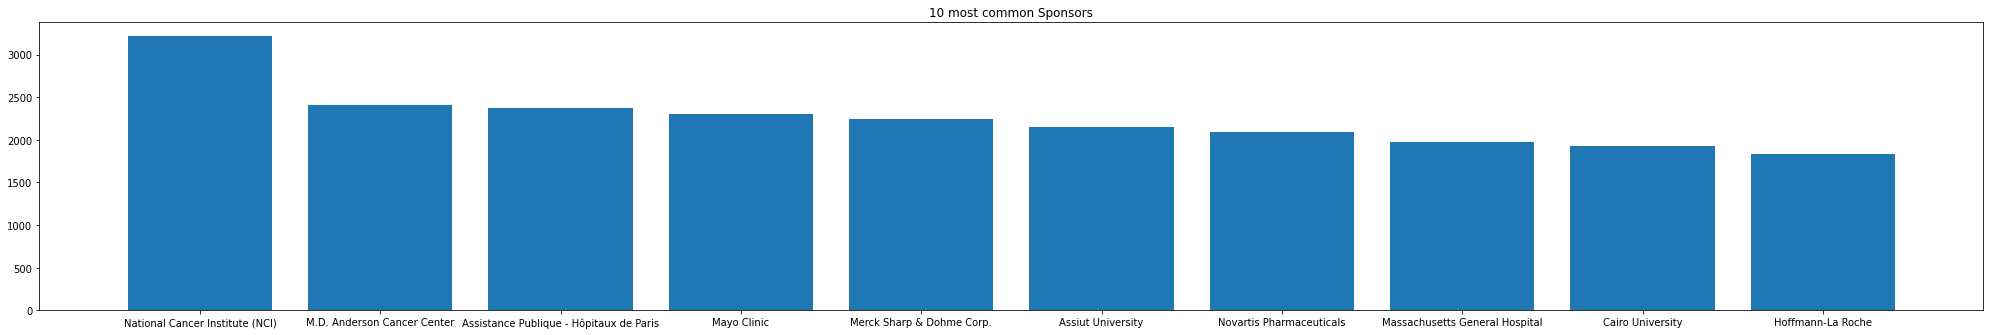

In [0]:

#Visualization
a,b = zip(*most_common_sponsors)
fig = plt.figure()
ax = fig.add_axes([0,0,4.5,1])
ax.set_title('10 most common Sponsors')
ax.bar(a,b)

most_common_sponsors

In [0]:
#CASE 6 -> Number of completed studies each month of 2021
completedstudy_rdd = clinicalrdd.map(lambda x : x.split('|'))\
.map(lambda x:[x[2],x[4]]).filter(lambda x: 'Completed' in x )\
.filter(lambda x: '2021' in x[1] )

In [0]:
#CASE 6 -> Number of completed studies each month of 2021
completedstudy_pair_rdd = completedstudy_rdd.map(lambda x: (x[1].split(' ')[0]))\
.map(lambda x: (x,1)).reduceByKey(lambda x,y : x+y)
completedstudy_pair_rdd.take(5)

Out[23]: [('May', 984), ('Jan', 1131), ('Jun', 1094), ('Mar', 1227), ('Feb', 934)]

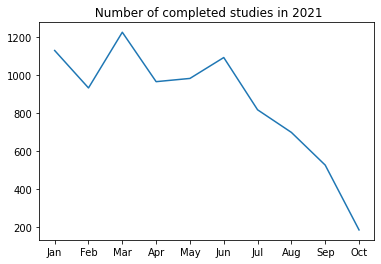

Out[24]: [('Jan', 1131),
 ('Feb', 934),
 ('Mar', 1227),
 ('Apr', 967),
 ('May', 984),
 ('Jun', 1094),
 ('Jul', 819),
 ('Aug', 700),
 ('Sep', 528),
 ('Oct', 187)]

In [0]:
#CASE 6 -> Number of completed studies each month of 2021
import calendar
month = {x:y for y,x in enumerate(calendar.month_abbr[1:],1)}
monthly_completed_study = completedstudy_pair_rdd.sortBy(keyfunc=lambda x: month.get(x[0])).collect()
monthly_completed_study

#Visualization
x,y = zip(*monthly_completed_study)
plt.plot(x,y)
plt.title(' Number of completed studies in 2021')
plt.show()
monthly_completed_study